# Resistive Switch : Data Analysis (single run)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
## Python Data from system
## Python Data from ccr runs 
# path = "Data_ccr/par_set_1_psd/trun5/"
# path = "Data_ccr/par_set_2_psd/trun2_2/"
# path = "../NoneqTrans2/Data_test/trun0_d1_40/"
path = "../mc2/Test_Data/trun5_1/"
# path2 = "Data_ccr/vrun8/"
Alldata = np.loadtxt(path + "delta_f2py_test.dat")
print(np.shape(Alldata))
nn = np.size(Alldata,0)
# A1 = Alldata[0:nn//2,:]
# A2 = Alldata[nn//2:nn,:]
A1 = Alldata[0:nn,:]
nn = np.size(A1,0)
print(np.shape(A1))


(50, 11)
(50, 11)


In [4]:
## Python Data Single run
# A1 = np.loadtxt("Data/run5/delta_f2py_test.dat")
# nn = np.size(A1,0)
# print(np.shape(A1))

In [5]:
inputs = open(path+"input_par.dat", "r")

print(inputs.read())
print(type(inputs))

{'g6': 0.5, 'g4': -1.0, 'g2': 1.0, 'coef': 0.1, 'nskip': 1, 'tloop': True, 'dphi': 0.2, 'Tc': 1.0, 'mfphi': False, 'r0': 3.5, 'Rload': 1.0, 'nwarm': 500000, 'my': 64, 'mx': 64, 'gamma': 0.1}{'Tbath': 0.4, 'seed': 8588523, 'maxE': 20.4, 'nmeas': 16384, 'dTb': 0.04, 'dE': 0.4, 'minT': 0.04, 'Tcrit': 1.32, 'maxT': 2.04, 'minE': 0.4}
<class '_io.TextIOWrapper'>


In [6]:
## Fortran Data
# Bdata = np.loadtxt("ifor_delta.dat")
# Bdata = np.loadtxt("Data/Test4/for_delta_test.dat")
# print(np.shape(Bdata))
# nn = np.size(Bdata,0)
# B1 = Bdata[0:int(nn/2),:]
# B2 = Bdata[int(nn/2)+1:nn,:]
# print(np.shape(B1))

In [7]:
#### Python Data Voltage Up
#### Python Data Voltage Up
# Vt_up = A1[:,0]
Es_up = A1[:,9]
Js_up = A1[:,10]
R_up = A1[:,7]
T_up = A1[:,0]
delta_up = A1[:,1]
#### Python Data Voltage Down
# E_dn = A2[:,0]
# T_dn = A2[:,0]
# delta_dn = A2[:,1]
# I_dn = A2[:,6]
# Vs_dn = A2[:,4]
# R_dn = A2[:,7]
# dR_dn = A2[:,9]

# #### Python Data Voltage Up - temperature Data
# Es_up = A1[:,9]
# Js_up = A1[:,10]
# R_up = A1[:,7]
# T_up = A1[:,0]
# dR_up = A1[:,9]
# #### Fortran Data Voltage Down
# V_dn_f = B2[:,0]
# delta_dn_f = B2[:,4]
# I_dn_f = B2[:,3]
# Vs_dn_f = B2[:,2]
# R_dn_f = B2[:,7]
print(T_up)

[0.04 0.08 0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56
 0.6  0.64 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.   1.04 1.08 1.12
 1.16 1.2  1.24 1.28 1.32 1.36 1.4  1.44 1.48 1.52 1.56 1.6  1.64 1.68
 1.72 1.76 1.8  1.84 1.88 1.92 1.96 2.  ]


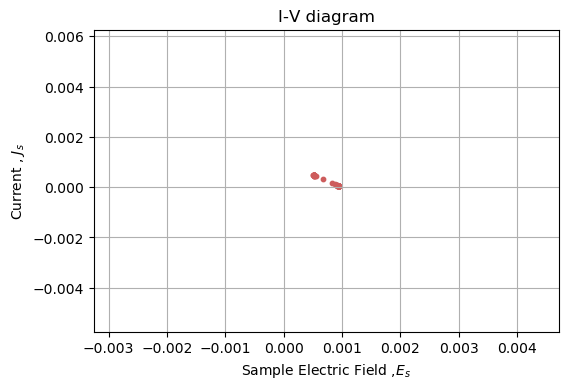

In [8]:
# plt.scatter(Vs_up_f, I_up_f, s = 20.0, c = 'Green', label="Inc V, Ft")
# plt.scatter(Vs_dn_f, I_dn_f, s = 20.0, c = 'Magenta', label="Dec V, Ft")
plt.scatter(Es_up, Js_up, s = 10.0, c = 'IndianRed')#, label=r'$T_{bath}$ = 0.85*$T_C$')
# plt.scatter(Vs_dn_py, I_dn_py, s = 10.0, c = 'RoyalBlue', label="Dec E, Py")


# plt.plot(Data_Set[:,0],Data_Set[:,1])
# plt.legend()
plt.title('I-V diagram')
plt.xlabel(r'Sample Electric Field ,$E_s$ ')
plt.ylabel(r'Current , $J_s$')
# plt.xlim(20.0,22.)
plt.grid(b=True,which='major', axis='both')
# plt.savefig(path + "I-V.pdf")

plt.show()

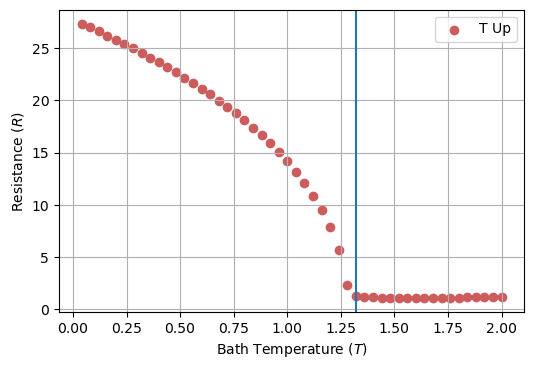

In [9]:
# plt.scatter(Vt_up,R_up, c="IndianRed", label=", Up")
# plt.ylabel('Resistance ($R$)')

# plt.scatter(T_up,np.abs(delta_up), c="IndianRed", label="T Up")
# plt.scatter(T_dn,np.abs(delta_dn))
# plt.ylabel('Delta ($\Delta$)')
plt.scatter(T_up,R_up, c="IndianRed", label="T Up")
# plt.scatter(T_dn,R_dn)
plt.ylabel('Resistance ($R$)')



plt.xlabel('Bath Temperature ($T$)')

plt.axvline(x=1.32)
# plt.xlim(250.,350.0)
# plt.xlim(650.,850.)
# plt.xlim(0.5,0.65)
# plt.xlim(1.1,1.4)
# plt.title('$n_{skip}$=16, $T_{bath} = 0.85*T_C$')
plt.grid(b=True,which='major', axis='both')
plt.legend()

# plt.savefig(path + "Resitance_v_Field.pdf")
# plt.savefig(path + "delta_vs_temp.pdf")
plt.show()

## Power Spectrum Distribution : method 1  
In this part we concatenate the time series from parallel runs and perform the PSD calculations. 

In [10]:
# # l = 2
# # nn = nn//2
# Tdata = []
# PSD = []
# Omega = []
# fs = 1000.0
# beta = 10.0
# window_length = 1000
# numoverlap = 880
# kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
# boxcarw = signal.boxcar(window_length)

# for i in range(nn):
#     tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat") ## Loading data of R(t) time series for each electric field 
#     R0 = np.mean(tdata)   ## Finding the mean of R(t) = R_0
#     ndata = np.size(tdata)  ## size of time series, ndata = 2048*16
#     delR = (tdata - R0*np.ones(ndata))  ## delR(t) = R(t) - R_0
# #     fval, R_ps = (signal.welch((delR/R0), fs, nperseg = window_length, window=kaiserw, noverlap = numoverlap)) ## PSD using welch method
#     fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap)) ## PSD using welch method
# #     fval,R_ps = signal.welch((delR/R0),fs,window='hann',nperseg=window_length, noverlap = numoverlap)
#     Tdata.append(tdata) 
#     PSD.append(R_ps/R0**2)
#     Omega.append(fval)
# #     if Vt_up[i] > 250. and Vt_up[i] < 350.0:
# #     if Vt_up[i] > 600. and Vt_up[i] < 800.0:    
# #     plt.plot((delR/R0) , label = "E = " + format(Vt_up[i], '.2f') )
#     plt.plot(tdata, label = "Vt = " + format(T_up[i], '.2f') ) 
# #     if Vt_up[i] == 529.2 :
# # #         plt.plot((delR/R0) , label = "V = " + format(Vt_up[i], '.2f') )
# #         plt.plot(tdata, label = "E = " + format(Vt_up[i], '.2f') )
# #     elif Vt_up[i] == 730.8 :
# # #         plt.plot((delR/R0) , label = "V = " + format(Vt_up[i], '.2f') )
# #         plt.plot(tdata, label = "E = " + format(Vt_up[i], '.2f') )
# #     elif Vt_up[i] == 1140.3 :
# # #         plt.plot((delR/R0) , label = "V = " + format(Vt_up[i], '.2f') )
# #         plt.plot(tdata, label = "E = " + format(Vt_up[i], '.2f') )
# #     elif Vt_up[i] == 844.2 :
# # #         plt.plot((delR/R0) , label = "V = " + format(Vt_up[i], '.2f') )
# #         plt.plot(tdata, label = "E = " + format(Vt_up[i], '.2f') )
# #     else: 
# #         None
        

# Tdata = np.array(Tdata)
# PSD = np.array(PSD)
# Omega = np.array(Omega)
# # print(Omega[1,:])
# print(np.shape(Tdata) , np.shape(PSD) , np.shape(Omega))
# # plt.xlim(0,5096)
# plt.xlabel("time")
# plt.ylabel("$\Delta R$/$R_0$")
# # plt.ylabel("R")
# # plt.ylim(-1.,1.)
# plt.legend()
# plt.title( r'$\Delta R/R_0$' + ", $N_{meas} = 2048*16$ , $N_{skip} = 8$ ")
# # # plt.savefig(path+"Rvt.pdf")
# plt.show()

In [11]:
# Vcrit = 730.8
# # Vcrit = 307.125
# # PSD_n = np.zeros(np.shape(PSD))
# # for i in range(nn):
# #     PSD_n[i,:] = (PSD[i,:]/((Alldata[i,7])**2))

# for i in range(nn):
# #     if Vt_up[i] < Vcrit:
#     plt.loglog(Omega[i,1:], PSD[i,1:], label = "E = " + format(T_up[i], '.2f') )

    
# PSD_snap = PSD[:,Omega[1,:] == 100.5859375] 
# # print(PSD_snap)
# plt.title("PSD vs freq, $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$, MF  ")
# # plt.axvline(x=1.)
# plt.axvline(x=150.)
# # plt.ylabel("$PSD^2$/$R^2$")
# plt.ylabel("PSD/$R_0^2$" )
# plt.xlabel("frequency")
# plt.xlim(1,1000)
# # plt.legend()
# # plt.ylim(1.0E-10,1.0E-2)
# plt.grid(b=True,which='major', axis='both')
# # plt.savefig(path+"PSDvf_16_wb_mf4.pdf")
# plt.show()

In [12]:
# alpha_up = []
# alpha_dn = []

# for i in range(nn):
#     if Vt_up[i] < Vcrit:
#         upper_cut_off = 200.0
#         lower_cut_off = 1.0
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     else: 
#         cut_off_freq = 10.
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     alpha_up.append(-p[0])
    
# # cutofffreq = window_length//2
# # for i in range(nn):
# #     lg_Omega = np.log(Omega[i,1:])
# #     lg_PSD = np.log(PSD[i,1:])
# #     p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
# # #     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
# # #     alpha_up.append(-slope)
# #     alpha_up.append(-p[0])

# alpha_up = np.array(alpha_up)
# alpha_dn = np.array(alpha_dn)
# # print(np.shape(alpha_up), np.shape(alpha_dn))
# # np.savetxt(path + "A_m1_02.dat", alpha_up)

# # plt.plot(E_up,alpha_up,label="Up")
# plt.scatter(Vt_up,alpha_up,label="Up")
# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title(r'$\alpha$' + " vs E , $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$  ")
# plt.legend()

# # plt.xlim(20.0,30.0)
# plt.ylim(1.5,2.0)
# plt.xlabel(r'Total Voltage (V_t)')
# plt.ylabel(r'$\alpha$')
# plt.grid(b=True,which='major', axis='both')
# # plt.savefig(path+"alpvf.pdf")
# plt.show()
    



In [13]:
# alpha_up = []
# alpha_dn = []
# print(Vcrit)
# # print(Omega[0,150])
# print(Omega)
# for i in range(nn):
#     if Vt_up[i] <= Vcrit:
#         upper_cut_off = 150
#         lower_cut_off = 1
#         lg_Omega = np.log(Omega[i,lower_cut_off:upper_cut_off])
#         lg_PSD = np.log(PSD[i,lower_cut_off:upper_cut_off])
#         p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
# #     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
# #     alpha_up.append(-slope)
# #         alpha_up.append(-p[0])
#     else: 
#         upper_cut_off = 150
#         lower_cut_off = 5
#         lg_Omega = np.log(Omega[i,lower_cut_off:upper_cut_off])
#         lg_PSD = np.log(PSD[i,lower_cut_off:upper_cut_off])
#         p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
# #     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
# #     alpha_up.append(-slope)
# #         alpha_up.append(-p[0])
#     alpha_up.append(-p[0])
    
# # cutofffreq = window_length//2
# # for i in range(nn):
# #     lg_Omega = np.log(Omega[i,1:])
# #     lg_PSD = np.log(PSD[i,1:])
# #     p = np.polyfit(lg_Omega, lg_PSD, deg = 1)
# # #     slope, intercept, r_value, p_value, std_err = stats.linregress(lg_Omega, lg_PSD)
# # #     alpha_up.append(-slope)
# #     alpha_up.append(-p[0])

# alpha_up = np.array(alpha_up)
# alpha_dn = np.array(alpha_dn)
# # print(np.shape(alpha_up), np.shape(alpha_dn))
# # np.savetxt(path + "A_m1_02.dat", alpha_up)


# # plt.plot(E_up,alpha_up,label="Up")
# plt.scatter(Vt_up[0:nn],alpha_up,label="Up")
# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title(r'$\alpha$' + " vs E , $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$  ")
# plt.legend()
# # np.savetxt(path+"alpha.dat", alpha_up)
# # plt.xlim(20.0,30.0)
# plt.ylim(0.8,2.0)
# plt.xlabel(r'Total Voltage (V_t)')
# plt.ylabel(r'$\alpha$')
# plt.grid(b=True,which='major', axis='both')
# # plt.savefig(path+"alpvf_mf4.pdf")
# plt.show()
    




In [14]:
# plt.subplot(1, 2, 1)
# plt.scatter(Vt_up[0:nn],alpha_up,label="Up")
# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title(r'$\alpha$' + " vs E , $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$  ")
# plt.legend()
# # np.savetxt(path+"alpha.dat", alpha_up)
# # plt.xlim(20.0,30.0)
# plt.ylim(0.8,2.0)
# plt.xlabel(r'Total Voltage (V_t)')
# plt.ylabel(r'$\alpha$')
# plt.grid(b=True,which='major', axis='both')
# # plt.savefig(path+"alpvf_mf2.pdf")
# plt.show()

# plt.subplot(1, 2, 2)
# for i in range(nn):
# #     if Vt_up[i] < Vcrit:
#     plt.loglog(Omega[i,1:], PSD[i,1:], label = "E = " + format(Vt_up[i], '.2f') )


# plt.title("PSD vs freq, $N_{meas} = 2048*16$ , $N_{skip} = 16$, $r_0 = 3.5$, MF  ")
# # plt.axvline(x=1.)
# plt.axvline(x=100.)
# # plt.ylabel("$PSD^2$/$R^2$")
# plt.ylabel("PSD/$R_0^2$" )
# plt.xlabel("frequency")
# plt.xlim(1,1000)
# # plt.legend()
# plt.ylim(1.0E-10,1.0E-2)
# plt.grid(b=True,which='major', axis='both')
# # plt.savefig(path+"PSDvf_16_wb_mf2.pdf")


# plt.show()


In [15]:

# rows = 8
# columns = 4
# fig=plt.figure(figsize=(40, 40))
# E = 19.
# for i in range(32):
# #     if i%16 == 0:  
#     globals()["phi_" + str(i)] = np.loadtxt(path + "phi_val_"+ format(E, '.2f')+ "_" +str(i)+".dat")
#     fig.add_subplot(rows, columns, (i+1))
#     plt.imshow(np.transpose((globals()["phi_" + str(i)])**2),cmap='rainbow',vmin=0.0,vmax=1.0)
#     plt.title("E = "+format(E, '.2f'))
# #     plt.xlabel("m_x")
# #     plt.ylabel("m_y")
# # plt.legend()    

# plt.show()



## Power Spectrum Distribution : method 2 
In this part we perform the PSD calculations and then concatenate the PSDs. 

In [16]:
# NP = 16
# nmeas = 2048
# Tdata = []
# PSD2 = []
# Omega = []
# fs = 1000.0
# kk = 10
# beta = 10.0
# window_length = 1000
# numoverlap = 880
# kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
# boxcarw = signal.boxcar(window_length)

# for i in range(nn):
#     tdata = np.loadtxt(path + "t_data_" + str(i) + ".dat")
#     tdata = tdata.reshape((NP,nmeas))
#     R0 = np.mean(tdata,axis=1)
#     R0 = R0.reshape((NP,1))
#     R0 = np.dot(R0,np.ones((1,nmeas)))
# #     print(R0)
#     delR = tdata - R0
#     fval, R_ps = np.absolute(signal.welch((delR/R0), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap)) ## PSD using welch method
# #     fval, R_ps = signal.welch((delR/R0)**2,fs, window=kaiser)
#     Tdata.append(tdata)
#     PSD2.append(R_ps)
#     Omega.append(fval)
# #     plt.plot(delR[0,:]/R0[0,:] , label = "Vt = " + format(Vt_up[i], '.2f') )
#     plt.plot(tdata[kk,:], label = "Vt = " + format(Vt_up[i], '.2f') )


    
# Tdata = np.array(Tdata)
# PSD2 = np.array(PSD2)
# Omega = np.array(Omega)
# print(np.shape(Tdata) , np.shape(PSD2) , np.shape(Omega))
# plt.xlabel("Time")
# plt.ylabel(r'$\frac{\Delta R}{\langle R \rangle}$', fontsize = 16)
# # plt.ylabel("R")
# # # plt.ylim(0,10)
# # plt.legend()
# plt.title("R vs t, $N_{meas} = 2048$ , $m_x = m_y = 64$  ")
# # # plt.savefig(path+"Rvt.pdf")
# plt.show()

In [17]:
# PSD_av = np.mean(PSD2,axis=1)
# print(np.shape(PSD2) , np.shape(PSD_av))

# for i in range(nn):
#     PSD_av[i,:] = PSD_av[i,:]/Alldata[i,7]

# for i in range(nn):
# #     plt.loglog(Omega[i,:], PSD_n[i,:], label = "E = " + format(E_up[i], '.2f') ,linestyle='dashed' )
#     plt.loglog(Omega[i,:], PSD_av[i,:], label = "Vt = " + format(Vt_up[i], '.2f') )


# #     plt.loglog(Omega[i,:], PSD[i,:])

# plt.title("PSD vs freq, $N_{meas} = 2048*16$ , $64*64$, $f_{samp}$ ="+ format(fs, '.1f') + ", $r_0 = 3.5$  ")
# plt.ylabel("PSD/$R^2$")
# plt.xlabel("frequency")
# plt.xlim(1,1000)
# # # plt.legend()
# plt.ylim(1.0E-10,1.0E-2)
# # plt.savefig(path+"PSDvf.pdf")
# plt.grid(b=True,which='major', axis='both')
# # plt.legend()
# plt.show()

In [18]:
# alpha_up = []
# alpha_dn = []
# for i in range(nn):
#     if E_up[i] < 23.0:
#         cut_off_freq = 10
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD_n[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     else: 
#         cut_off_freq = 100
#         Omega_red = Omega[i,Omega[i,:] > cut_off_freq]
#         data_trunc = np.shape(Omega_red)[0] 
#         data_pts = np.shape(Omega)[1]
#         lg_Omega = np.log(Omega_red)
#         lg_PSD = np.log(PSD_n[i,data_pts - data_trunc:])
#         p = np.polyfit(lg_Omega[:], lg_PSD[:], deg = 1)
#     alpha_up.append(-p[0])

    
# alpha_up = np.array(alpha_up)
# alpha_dn = np.array(alpha_dn)
# # print(np.shape(alpha_up), np.shape(alpha_dn))
# # np.savetxt(path + "A_m2_8.dat", alpha_up)

# # plt.plot(E_up,alpha_up,label="Up")
# plt.scatter(E_up,alpha_up,label="Up")
# # plt.scatter(E_dn_py,alpha_dn, c = "RoyalBlue", label="Down")
# plt.title("alpha vs V , $N_{meas} = 2048*16$ , $64*64$, $f_{samp}$ ="+ format(fs, '.1f') + ", $r_0 = 3.5$  ")
# plt.legend()
# # plt.savefig(path+"alpvf.pdf")
# plt.xlabel("Electric Field (E)")
# plt.ylabel(r'$\alpha$')
# plt.grid(b=True,which='major', axis='both')
# plt.show()
    